In [1]:
# install required packages

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from numpy import linalg as LA
from scipy.linalg import logm, expm
import qutip as qt
from math import sqrt
from qutip import *
import cmath, math
from numpy import linalg as lin
from scipy import linalg

In [ ]:
# Define up, down states
up_ket = np.array([[1],[0]])
down_ket = np.array([[0],[1]])
up_bra = np.array([[1,0]])
up_bra = np.conj(up_ket.T)

# Define Pauli matrices 
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,-1j],[1j,0]])
sigma_z = np.array([[1,0],[0,-1]])


In [ ]:
# qutip practice - defining quantum objects (qObjs)

print(Qobj([[1],[2],[3],[4]]))
print()

A = Qobj([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
B = Qobj([[1, 2+1j, 5-4j], [2-1j, 4, 6j], [5+4j, -6j, 2]])

print(A)
print()
print(A.check_herm())
print()
print()
print(B)
print()
print(B.check_herm())
print()
print("Trace:", B.tr())
print()
print(B.groundstate())
print()
print(B.unit())

Quantum object: dims=[[4], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [2.]
 [3.]
 [4.]]

Quantum object: dims=[[3], [4]], shape=(3, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]

False


Quantum object: dims=[[3], [3]], shape=(3, 3), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.+0.j  2.+1.j  5.-4.j]
 [ 2.-1.j  4.+0.j  0.+6.j]
 [ 5.+4.j -0.-6.j  2.+0.j]]

True

Trace: 7.0

(-7.745820318837931, Quantum object: dims=[[3], [1]], shape=(3, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.5966494 +0.j        ]
 [-0.33067903+0.30219852j]
 [-0.49215335-0.44846628j]])

Quantum object: dims=[[3], [3]], shape=(3, 3), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.04446096+0.j         0.08892193+0.04446096j 0.22230481-0.17784385j]
 [0.08892193-0.04446096j 0.17784385+0.j         0.        +0.26676578j]
 [0.22230481+0.17784385j 0.        -0.26676578j 0.08892193+0.j        ]]


In [ ]:
# Functions 

####################################################################################
# Hamiltonian Functions (one-dimensional)

def H_transmon(E_C, E_J, ng, N, cos):
    H = Qobj(4*E_C*(N - ng)**2 - E_J*cos)
    return H

def H_fluxonium(E_C, E_J, E_L, N, phi, phi_ext):
    cos_phi = phi.cosm()
    H = Qobj(4*E_C*(N)**2 - E_J*cos_phi + E_L/2*(phi - phi_ext)**2)
    return H 

def H_kite_pi(E_C, E_J, E_L, E_R, N, phi, phi_ext):
    cos_2phi = (2*phi).cosm()
    H = Qobj(4*E_C*(N/2)**2 + E_R*(phi + phi_ext)**2 + E_J*cos_2phi)
    return H

def H_kite_0(E_C_tilda, E_J_tilda, E_L, E_R, N, phi, phi_ext): 
    cos_phi = phi.cosm()
    H = Qobj(4*E_C_tilda*(N)**2 + E_R*(phi + phi_ext)**2 - E_J_tilda*cos_phi)
    return H

# Hamiltonian Functions (two-dimensional)

def H_kite_2d_pi(E_C, E_L, E_J, E_R, epsilon_L, phi_sigma, phi_delta, phi_ext, N_sigma, N_delta):
    H = 2*E_C*(N_sigma**2 + N_delta**2) + E_R*(phi_sigma + phi_ext)**2 + epsilon_L*phi_delta**2 + 2*E_J*np.sin(phi_sigma)*np.sin(phi_delta)
    return H 

def H_kite_2d_0(E_C, E_L, E_J, E_R, epsilon_L, phi_sigma, phi_delta, phi_ext, N_sigma, N_delta):
    H = 2*E_C*(N_sigma**2 + N_delta**2) + E_R*(phi_sigma + phi_ext)**2 + epsilon_L*phi_delta**2 - 2*E_J*np.cos(phi_sigma)*np.cos(phi_delta)
    return H

#####################################################################################

# Potential Energy Functions

def U_fluxonium(E_J, E_L, phi, phi_ext):
    U = -E_J*np.cos(phi) + E_L/2*(phi - phi_ext)**2
    return U

def U_kite_pi(E_J, E_L, E_R, phi, phi_ext):
    U = E_R*(phi + phi_ext)**2 + E_J*np.cos(2*phi)
    return U

def U_kite_0(E_J_tilda, E_L, E_R, phi, phi_ext): 
    U =  E_R*(phi + phi_ext)**2  - E_J_tilda*np.cos(phi)
    return U
    

In [ ]:

############################################################################################################################
# Transmon qubit analysis

# for the transmon qubit, the charge and tunneling basis is best for analysis. 
# The transmon computation is easy becauser the Hamiltonian has elements that are mostly along, or near the diagonal. 
# This is not the case for the fluxonium qubit, which becomes a mess when interpreted in the same basis.
# The fluxonium qubit is instead interpreted/analysed in the position, momentum basis as it is not as easy to perform computations

#############################################################################################################################

# E_C and E_J set baring in mind that we want to operate in the Transmon regime, where E_J/E_C ratio is large sine E_J is the dominant term.
E_C = 20 
E_J = 20

# number of states in the system
n = 20

# use charge, tunneling basis for the transmon qubit
# this will be a matrix from -20 to 20 as the diagonal elements
N = qt.charge(n)

# dimensions of the physical matrix and the best 
cos = qt.tunneling(2*n + 1)

# set up array of values for n_g (term to vary for the transmon qubit)
# create array for the eigenvalues of the transmon Hamiltonian for each value of n_g
ng_list = np.linspace(-2, 2, 101)
eigvals_list = np.empty((2*n + 1, len(ng_list)), dtype = float)

for i, ng in enumerate(ng_list):
    H = H_transmon(E_C, E_J, ng, N, cos)

    # Take the lowest value energy of the Hamiltonian and assign it to
    # row of the eigenvalue array.
    eigvals_list[:,i] = H.eigenstates()[0]


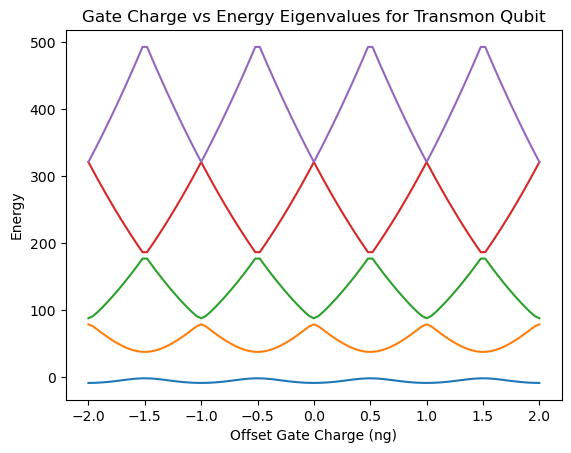

In [ ]:
# Plotting for the transmon analysis

plt.title('Gate Charge vs Energy Eigenvalues for Transmon Qubit')
plt.xlabel('Offset Gate Charge (ng)')
plt.ylabel('Energy')
for i in range(5):
    plt.plot(ng_list, eigvals_list[i])
    


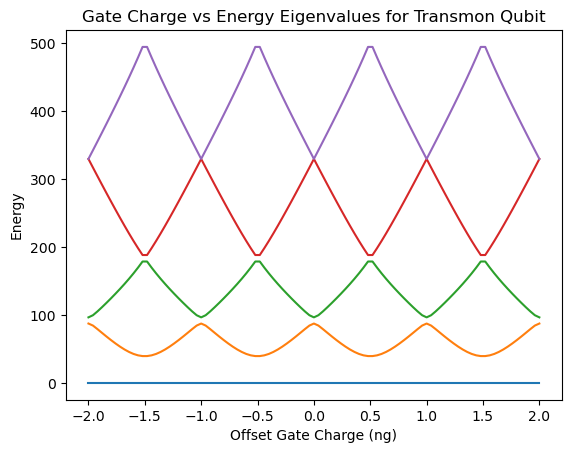

In [ ]:
plt.title('Gate Charge vs Energy Eigenvalues for Transmon Qubit')
plt.xlabel('Offset Gate Charge (ng)')
plt.ylabel('Energy')
for i in range(5):
    plt.plot(ng_list, eigvals_list[i] - eigvals_list[0])

In [ ]:
#######################################################################################
# Fluxonium Qubit Analysis

# Fluxonum qubit analysed in the position, momentum basis as Hamiltonian is not as easy
# work with as in the case of the Transmon qubit

#######################################################################################

# E_C and E_J set baring in mind that we want to operate in the Transmon regime, where E_J/E_C ratio is large sine E_J is the dominant term.
E_C = 2.5
E_J = 9
E_L = 0.52

# number of states in the system
n = 100

# define quantum operators in the position/momentum basis
N = qt.momentum(n)
phi = qt.position(n)

phiext_list = np.linspace(-2*np.pi, 2*np.pi, 101)
eigvals_list1 = np.empty((n, len(phiext_list)), dtype = float)

for i, phiext in enumerate(phiext_list):
    H = H_fluxonium(E_C, E_J, E_L, N, phi, phiext)
    eigvals_list1[:,i] = H.eigenstates()[0]



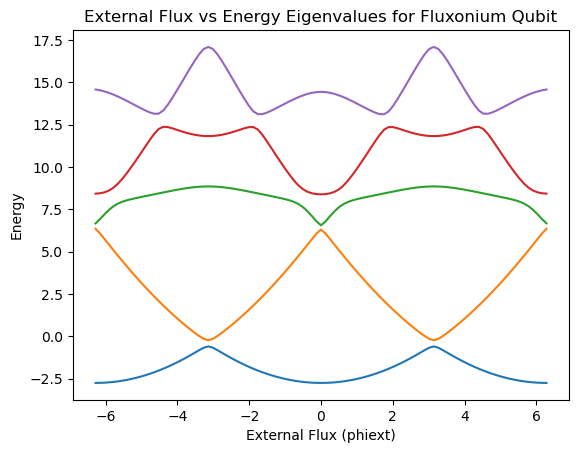

In [ ]:
# Plotting for the fluxonium analysis

plt.title('External Flux vs Energy Eigenvalues for Fluxonium Qubit')
plt.xlabel('External Flux (phiext)')
plt.ylabel('Energy')
for i in range(5):
    plt.plot(phiext_list, eigvals_list1[i])
    

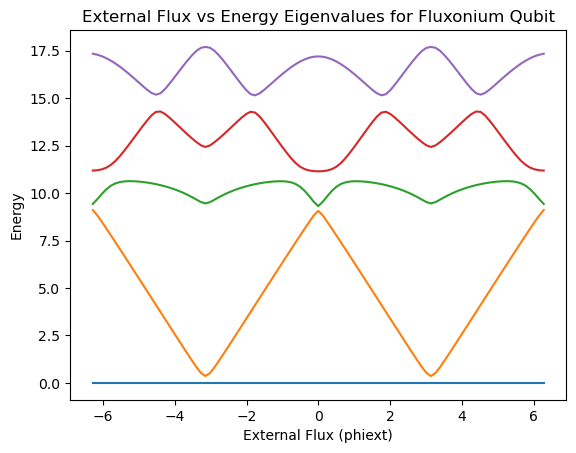

In [ ]:
# Scale Graph Down to the ground state 
# - take the difference between each state and the ground state

eigvals_list1_diff = np.empty((n, len(phiext_list)), dtype = float)
ground = eigvals_list1[0]

for i in range(len(eigvals_list1)):
    eigvals_list1_diff[i] = eigvals_list1[i] - ground

# Plot new values
plt.title('External Flux vs Energy Eigenvalues for Fluxonium Qubit')
plt.xlabel('External Flux (phiext)')
plt.ylabel('Energy')
for i in range(5):
    plt.plot(phiext_list, eigvals_list1_diff[i])



C:\Users\patri\AppData\Local\Temp\ipykernel_9408\4285962176.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  phi_psi[i] = (phi_vecs[i]).dag()*psi


ValueError: x, y, and format string must not be None

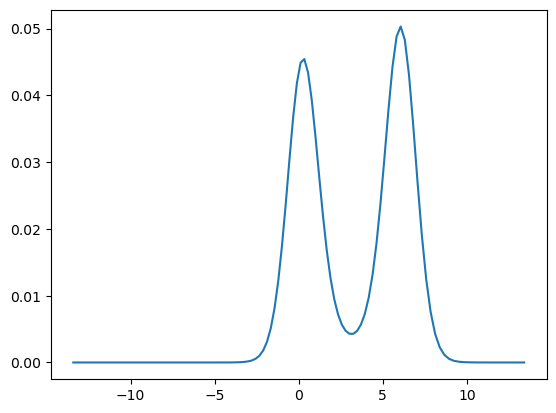

In [ ]:
# Energy vs flux Fluxonium Qubit

n = 100
phi_ext = np.pi
phi = qt.position(n)
N = qt.momentum(n)

E_C = 2.5
E_J = 9
E_L = 0.52

# Hamiltonian
H = H_fluxonium(E_C, E_J, E_L, N, phi, phi_ext)

# H,and phi eigenvectors/eigenvalues
H_vals, H_vecs = H.eigenstates()
phi_vals, phi_vecs = phi.eigenstates()

# state vector
psi = H_vecs[0]

phi_psi = np.empty((len(phi_vecs), 1), dtype = float)

# plotting |<psi_i|phi>|^2
for i in range(len(phi_vecs)):
    phi_psi[i] = (phi_vecs[i]).dag()*psi  

# plot probability wave function
plt.plot(phi_vals, abs(phi_psi)**2)
# plot potential
plt.plot(phi_vals, U_fluxonium(E_J, E_L, phi_vals, phi_ext))


plt.title('Energy vs Flux for Fluxonium Qubit')
plt.xlabel('phi')
plt.ylabel('U')


In [ ]:
###############################################################################################
# KITE Qubit Analysis

# Hamiltonian for theta_ext = 0, pi bias points, where theta_ext is the flux going through the KITE
# structure
###############################################################################################

# Parameters for KITE qubit circuit (GHz), and all values scaled by h
E_C = 6.6 
E_L = 0.23
E_J = 5.9
epsilon_L = 0.36
epsilon_C = 2.5
E_J_tilda = 1.7
E_C_tilda = 1.5
phiext_list1 = np.linspace(-2*np.pi, 2*np.pi, 101)
# theta_ext =  pi Hamiltonian eigenvalues
eigvals_list2 = np.empty((n, len(phiext_list1)), dtype = float)
# theta_ext = 0 Hamiltonian eigenvalues
eigvals_list3 = np.empty((n, len(phiext_list1)), dtype = float)

E_R = (E_L*epsilon_L)/(E_L + 2*epsilon_L)

# Number of energy states in the system
n = 100

# Quantum operators (basis for analysis) -> same as fluxonium since this is also a flux qubit? 
phi = qt.position(n)
N =  qt.momentum(n)

for i, phi_ext in enumerate(phiext_list1):
    H_pi = H_kite_pi(E_C, E_J, E_L, E_R, N, phi, phi_ext)
    H_0 = H_kite_0(E_C_tilda, E_J_tilda, E_L, E_R, N, phi, phi_ext)
    eigvals_list2[:,i] = H_pi.eigenstates()[0]
    eigvals_list3[:,i] = H_0.eigenstates()[0]


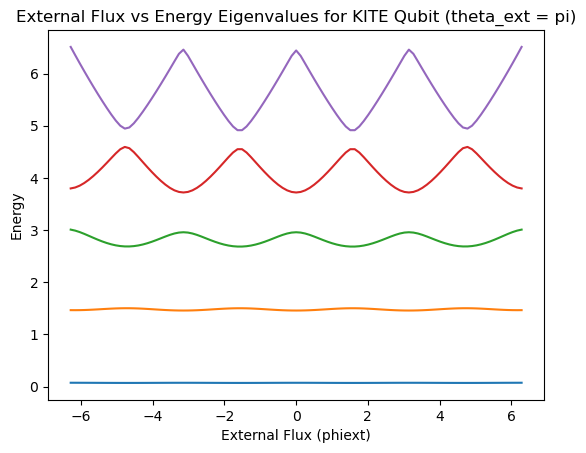

In [ ]:
# Plotting for KITE analysis (theta_ext = pi)

plt.title('External Flux vs Energy Eigenvalues for KITE Qubit (theta_ext = pi)')
plt.xlabel('External Flux (phiext)')
plt.ylabel('Energy')
for i in range(5):
    plt.plot(phiext_list1, eigvals_list2[i])
    

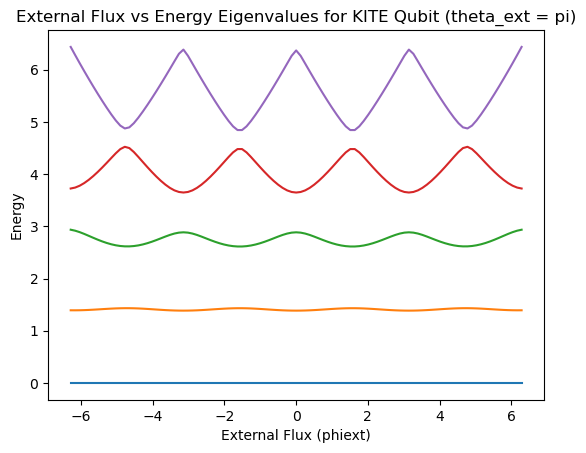

In [ ]:
# Energy differences with the ground state (theta_ext = pi)
plt.title('External Flux vs Energy Eigenvalues for KITE Qubit (theta_ext = pi)')
plt.xlabel('External Flux (phiext)')
plt.ylabel('Energy')
for i in range(5):
    plt.plot(phiext_list1, eigvals_list2[i] - eigvals_list2[0])

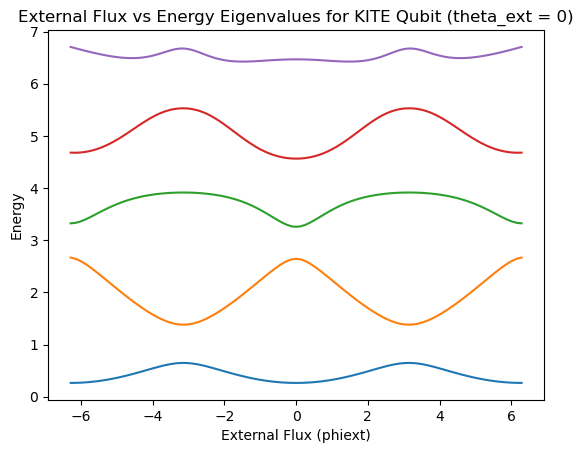

In [ ]:
# Plotting for KITE analysis (theta_ext = 0)

plt.title('External Flux vs Energy Eigenvalues for KITE Qubit (theta_ext = 0)')
plt.xlabel('External Flux (phiext)')
plt.ylabel('Energy')
for i in range(5):
    plt.plot(phiext_list1, eigvals_list3[i])

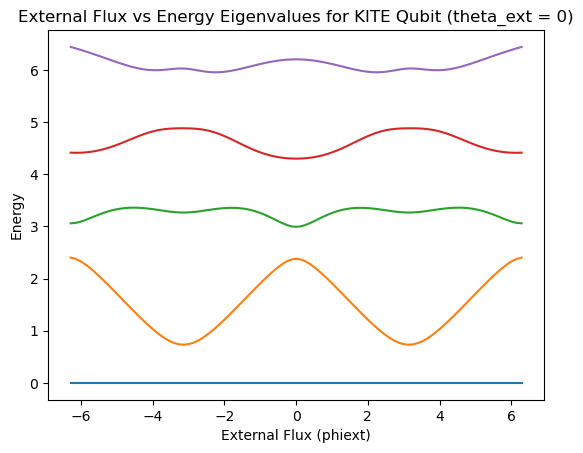

In [ ]:
# Energy differences with the ground state (theta_ext = 0)
plt.title('External Flux vs Energy Eigenvalues for KITE Qubit (theta_ext = 0)')
plt.xlabel('External Flux (phiext)')
plt.ylabel('Energy')
for i in range(5):
    plt.plot(phiext_list1, eigvals_list3[i] - eigvals_list3[0])

In [ ]:
###############################################################################################

# Plotting energy wavefunctions for KITE qubit

###############################################################################################

# Parameters for KITE qubit circuit (GHz), and all values scaled by h
E_C = 6.6
E_L = 0.11
E_J = 5.9
epsilon_L = 0.36
epsilon_C = 2.5
E_J_tilda = 1.7
E_C_tilda = 1.5

# flux going through the kite structure 
# set to constant value, can change for different results
phi_ext = np.pi
n = 100

# Constant factor in the Hamiltonian/potential energy expressions
E_R = (E_L*epsilon_L)/(E_L + 2*epsilon_L)

# Quantum operators
phi = qt.position(n)
N = qt.momentum(n)

# Compute Hamiltonian (theta_ext = pi)
H = H_kite_pi(E_C, E_J, E_L, E_R, N, phi, phi_ext)

# Get the n eigenstates and associated eigenvalues of the Hamiltonian and the position operator
# (position operator corresponds to the position observable) 
H_vals, H_vecs = H.eigenstates()
phi_vals, phi_vecs = phi.eigenstates()

# state vector
psi = H_vecs[0]

phi_psi = np.empty((len(phi_vecs), 1), dtype = float)

# plotting |<psi_i|phi>|^2
for i in range(len(phi_vecs)):

    # is this equivalent to <psi_i|phi> for a particular eigenvalue of the position operator and a particular eigenstate of the Hamiltonian???
    phi_psi[i] = (phi_vecs[i]).dag()*psi  

plt.title('Potential Energy against Flux Phi through JJ (theta_ext = pi)')
plt.xlabel('phi')
plt.ylabel('U/E_J')
plt.plot(phi_vals, abs(phi_psi)**2)
plt.plot(phi_vals, U_kite_pi(E_J, E_L, E_R, phi_vals, phi_ext)/(50*E_J))



TypeError: float() argument must be a string or a real number, not 'complex'

C:\Users\patri\AppData\Local\Temp\ipykernel_9408\2702430671.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  phi_psi[i] = (phi_vecs[i]).dag()*psi


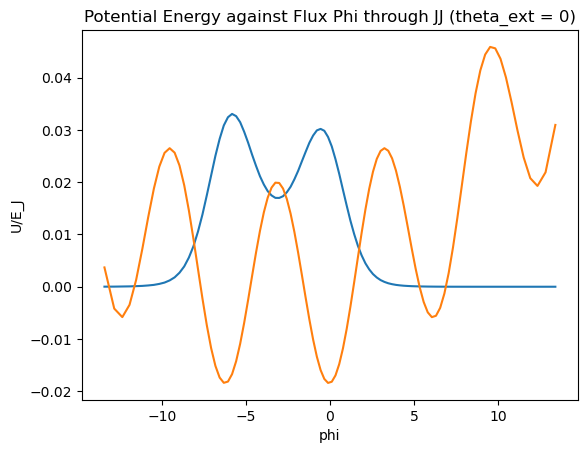

In [ ]:
# theta_ext = 0 bias point

# Compute Hamiltonian (theta_ext = 0)
H = H_kite_0(E_C_tilda, E_J_tilda, E_L, E_R, N, phi, phi_ext)

# eigenvalues/eigenvectors
H_vals, H_vecs = H.eigenstates()

# state vector
psi = H_vecs[0]

for i in range(len(phi_vecs)):
    phi_psi[i] = (phi_vecs[i]).dag()*psi  

plt.title('Potential Energy against Flux Phi through JJ (theta_ext = 0)')
plt.xlabel('phi')
plt.ylabel('U/E_J')
plt.plot(phi_vals, abs(phi_psi)**2)
plt.plot(phi_vals, U_kite_0(E_J, E_L, E_R, phi_vals, phi_ext)/(50*E_J))

In [ ]:
#############################################################################################

# 2D Hamiltonian for KITE qubit (theta_ext = pi)

#############################################################################################

# flux across the two Josephson Junctions in the KITE structure

# what value to set for flux???
phi1 = 100
phi2 = 50
n = 100

# Other standard parameters
E_C = 6.6 
E_L = 0.23
E_J = 5.9
epsilon_L = 0.36
epsilon_C = 2.5

# Define new flux variables
phi_sigma = 1/2*(phi1 + phi2)
phi_delta = 1/2*(phi1 - phi2)

# constant in Hamiltonian expression
E_R = (E_L*epsilon_L)/(E_L + 2*epsilon_L)

# N_sigma and N_delta are the conjugate cooper pair numbers to phi_sigma, phi_delta
# how to define???
N_sigma = 1
N_delta = 1

phiext_list = np.linspace(-2*np.pi, 2*np.pi, 101)
eigvals_list = np.empty((n, len(phiext_list)), dtype = float)

for i, phi_ext in enumerate(phiext_list):
    H_pi = H_kite_2d_pi(E_C, E_L, E_J, E_R, epsilon_L, phi_sigma, phi_delta, phi_ext, N_sigma, N_delta)
    H_0 = H_kite_2d_0(E_C, E_L, E_J, E_R, epsilon_L, phi_sigma, phi_delta, phi_ext, N_sigma, N_delta)
    eigvals_list_pi[:,i] = H_pi.eigenstates()[0]
    eigvals_list_0[:,i] = H_0.eigenstates()[0]
